This chart shows the dividends on shares of one selected company over the past 5 years.



you can change the "ticker" variable to see the dividends on other companies' shares.

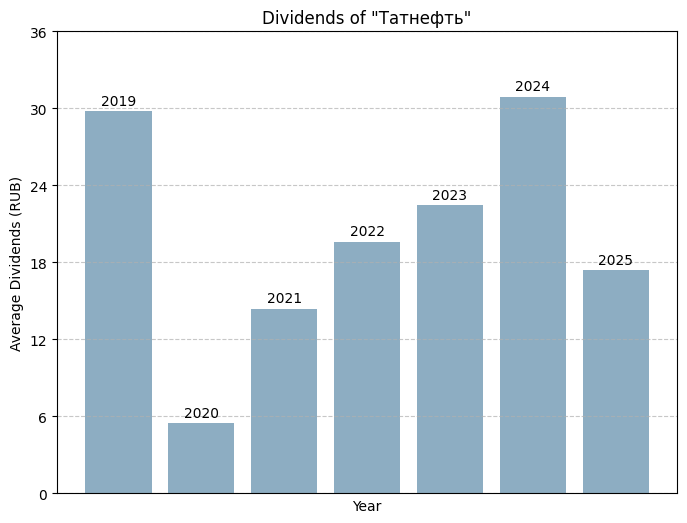

In [5]:
import json
import matplotlib.pyplot as plt
import datetime
import numpy as np

with open('Database/combined_data_dividends.json', 'r') as file:
    data = [json.loads(line) for line in file]

with open('mapping.txt', 'r', encoding='utf-8') as file:
    company_mapping = json.load(file)

ticker_to_company = {v: k for k, v in company_mapping.items()}

#filtering data for a specific ticker
ticker = 'TATNP'
company_name = ticker_to_company.get(ticker, ticker) #get comany name 
filtered_data = [item for item in data if item['DIV_TICK'] == ticker]

#conversion of dates and values of dividends
year_dividends = {}
for item in filtered_data:
    year = datetime.datetime.strptime(item['registryclosedate'], '%Y-%m-%d').year
    dividend = float(item['value'])
    if year in year_dividends:
        year_dividends[year].append(dividend)
    else:
        year_dividends[year] = [dividend]

#calculating average dividends per year
years = sorted(year_dividends.keys())
avg_dividends = [np.mean(year_dividends[year]) for year in years]

max_dividend = max(avg_dividends) if avg_dividends else 1
y_tick_step = max(1, int(max_dividend / 5))

#upper bound of Y
y_bound = max_dividend + y_tick_step

plt.figure(figsize=(8, 6))
bars = plt.bar(years, avg_dividends, color='#5D8AA8', alpha=0.7)

#set year on the top of bar
for bar, year in zip(bars, years):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, str(year), ha='center', fontsize=10)

plt.xlabel('Year')
plt.ylabel('Average Dividends (RUB)')
plt.title(f'Dividends of "{company_name}"')
plt.xticks([])
plt.yticks(range(0, int(y_bound) + 1, y_tick_step))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


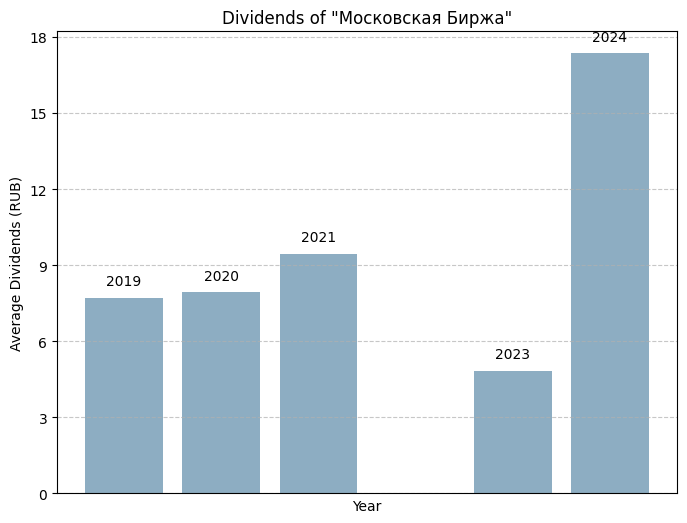

In [12]:
import json
import matplotlib.pyplot as plt
import datetime
import numpy as np

with open('Database/combined_data_dividends.json', 'r') as file:
    data = [json.loads(line) for line in file]

with open('mapping.txt', 'r', encoding='utf-8') as file:
    company_mapping = json.load(file)

ticker_to_company = {v: k for k, v in company_mapping.items()}

#filtering data for a specific ticker
ticker = 'MOEX'
company_name = ticker_to_company.get(ticker, ticker) #get comany name 
filtered_data = [item for item in data if item['DIV_TICK'] == ticker]

#conversion of dates and values of dividends
year_dividends = {}
for item in filtered_data:
    year = datetime.datetime.strptime(item['registryclosedate'], '%Y-%m-%d').year
    dividend = float(item['value'])
    if year in year_dividends:
        year_dividends[year].append(dividend)
    else:
        year_dividends[year] = [dividend]

#calculating average dividends per year
years = sorted(year_dividends.keys())
avg_dividends = [np.mean(year_dividends[year]) for year in years]

max_dividend = max(avg_dividends) if avg_dividends else 1
y_tick_step = max(1, int(max_dividend / 5))

#upper bound of Y
y_bound = max_dividend + y_tick_step

plt.figure(figsize=(8, 6))
bars = plt.bar(years, avg_dividends, color='#5D8AA8', alpha=0.7)

#set year on the top of bar
for bar, year in zip(bars, years):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, str(year), ha='center', fontsize=10)

plt.xlabel('Year')
plt.ylabel('Average Dividends (RUB)')
plt.title(f'Dividends of "{company_name}"')
plt.xticks([])
plt.yticks(range(0, int(y_bound) + 1, y_tick_step))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


This chart shows a comparison of the companies (which we are considering) in terms of dividends for a given year.


to view a different year, change the "year" variable

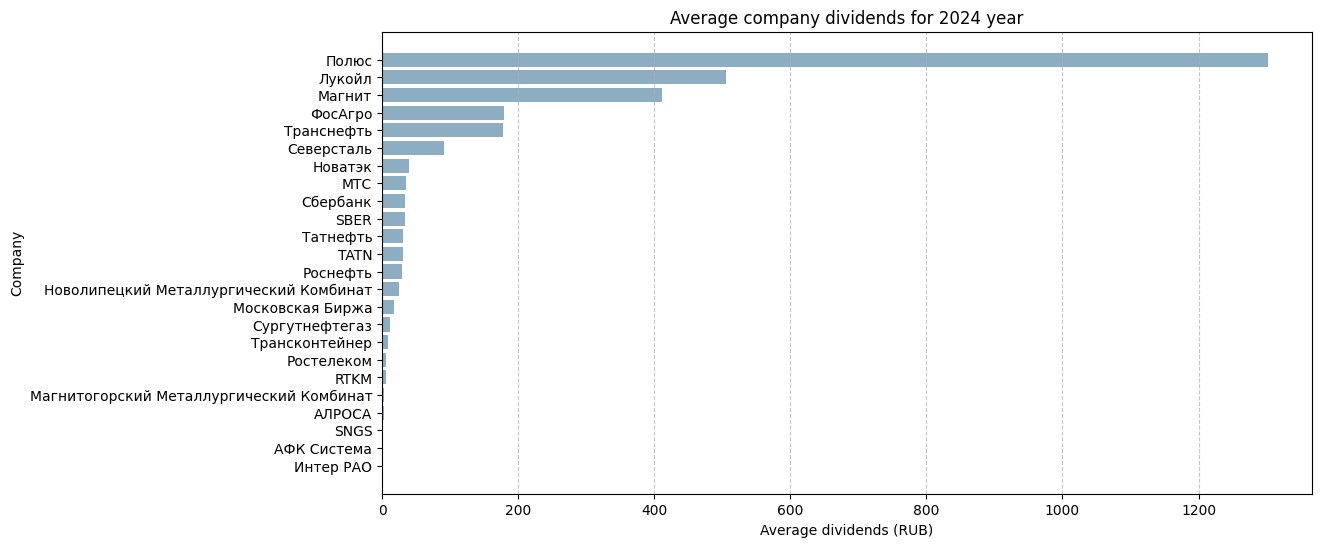

In [18]:
import json
import matplotlib.pyplot as plt
import numpy as np
import datetime

with open('Database/combined_data_dividends.json', 'r') as file:
    data = [json.loads(line) for line in file]

with open('mapping.txt', 'r', encoding='utf-8') as file:
    company_mapping = json.load(file)

ticker_to_company = {v: k for k, v in company_mapping.items()}

#filter data only for 2024
year = 2024
dividends_by_company = {}
for item in data:
    reg_year = datetime.datetime.strptime(item['registryclosedate'], '%Y-%m-%d').year
    if reg_year == year:
        ticker = item['DIV_TICK']
        company_name = ticker_to_company.get(ticker, ticker)
        dividend = float(item['value'])
        if company_name in dividends_by_company:
            dividends_by_company[company_name].append(dividend)
        else:
            dividends_by_company[company_name] = [dividend]

#average dividends for each company
companies = list(dividends_by_company.keys())
avg_dividends = [np.mean(dividends_by_company[company]) for company in companies]

#sort company by average dividends
sorted_indices = np.argsort(avg_dividends)[::-1]
companies = [companies[i] for i in sorted_indices]
avg_dividends = [avg_dividends[i] for i in sorted_indices]


plt.figure(figsize=(12, 6))
plt.barh(companies, avg_dividends, color='#5D8AA8', alpha=0.7)
plt.xlabel('Average dividends (RUB)')
plt.ylabel('Company')
plt.title(f'Average company dividends for {year} year')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.show()
